In [1]:
import os
import pandas as pd
import statistics
from datetime import date
from tqdm import tqdm
import plotly.express as px

In [2]:
cd ..

/Users/pedrocosta/MSE/VI/Projet/projet_vi


In [3]:
import settings as st

## Usefull path

In [4]:
armed_conflict = st.files['armed_conflict']

In [5]:
armed_conflict_path = os.path.join(armed_conflict, "armed_conflict.xlsx")
articles_armed_conflict_path = os.path.join(armed_conflict, "articles_armed_conflict.xlsx")
pruned_aricles_armed_conflict_path = os.path.join(armed_conflict, "pruned_articles_armed_conflict.xlsx")

## Read the excel file

In [6]:
df = pd.read_excel(pruned_aricles_armed_conflict_path)

In [7]:
durations = []

for _, row in df.iterrows():
    duration = row.date_end - row.date_start 
    durations.append(duration.days)

In [8]:
articles = []

for _, row in df.iterrows():
    articles.append(0 if row.number_of_sources < 0 else row.number_of_sources)

In [69]:
articles_by_duration = {}

for _, row in tqdm(df.iterrows()):
    
    duration = row.date_end - row.date_start
    duration = duration.days
    article = row.number_of_sources
    
    if duration not in articles_by_duration.keys():
        articles_by_duration[duration] = []
    
    articles_by_duration[duration].append(article)

47239it [00:11, 4280.22it/s]


In [70]:
plot_df = pd.DataFrame(columns=['median_article', 'duration'])

for duration in articles_by_duration.keys():
        articles = articles_by_duration[duration]
        median_articles = statistics.median(articles)

        new_row = {'duration': duration, 'median_article': median_articles}
        plot_df = plot_df.append(new_row, ignore_index=True)

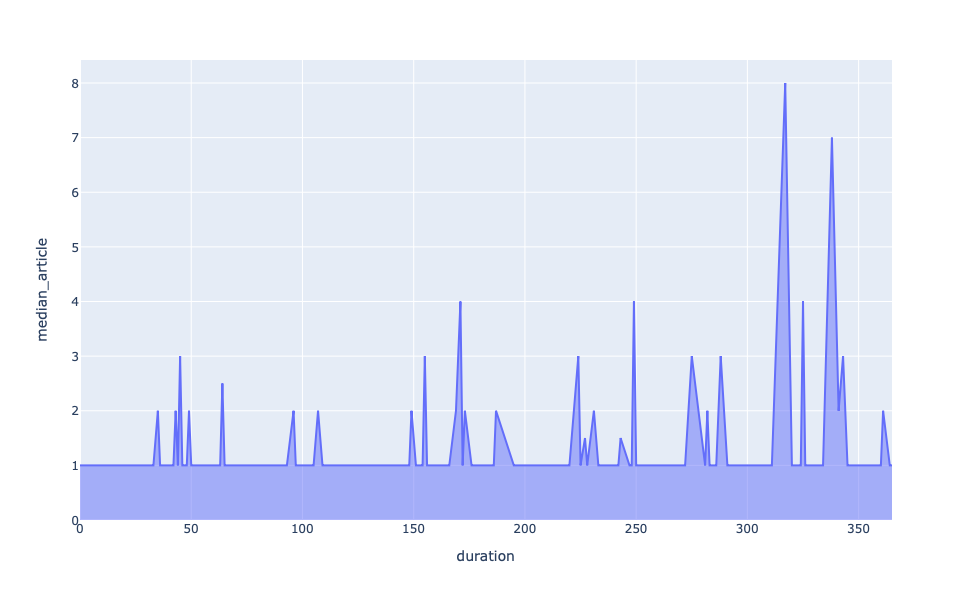

In [72]:
fig = px.area(plot_df, x='duration', y='median_article')
fig.show()

In [64]:
deaths_by_duration = {}

for _, row in tqdm(df.iterrows()):
    
    duration = row.date_end - row.date_start
    duration = duration.days
    deaths = row.deaths_a + row.deaths_b + row.deaths_civilians
    
    if duration not in deaths_by_duration.keys():
        deaths_by_duration[duration] = []
    
    deaths_by_duration[duration].append(deaths)

47239it [00:13, 3604.12it/s]


In [67]:
plot_df = pd.DataFrame(columns=['median_deaths', 'duration'])

for duration in deaths_by_duration.keys():
        deaths = deaths_by_duration[duration]
        median_deaths = statistics.median(deaths)

        new_row = {'duration': duration, 'median_deaths': median_deaths}
        plot_df = plot_df.append(new_row, ignore_index=True)

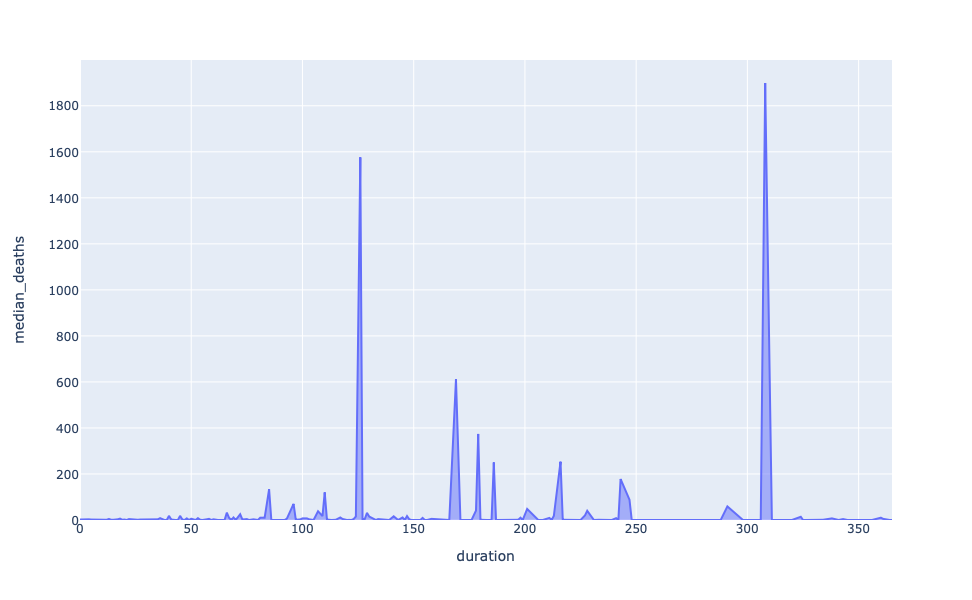

In [68]:
fig = px.area(plot_df, x='duration', y='median_deaths')
fig.show()

In [73]:
deaths_dict = {'deaths_a': 0, 'deaths_b': 0, 'deaths_civilian': 0}

for _, row in tqdm(df.iterrows()):
    deaths_dict['deaths_a'] += row.deaths_a
    deaths_dict['deaths_b'] += row.deaths_b
    deaths_dict['deaths_civilian'] += row.deaths_civilians

47239it [00:09, 5222.24it/s]


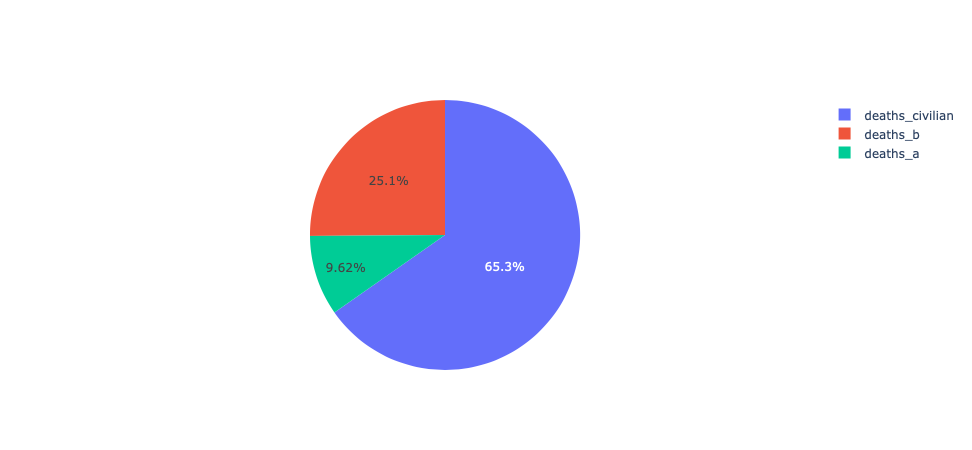

In [76]:
import plotly.graph_objects as go

labels = list(deaths_dict.keys())
values = list(deaths_dict.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()